

# Classificação de roupas

# Etapa 1: Importação das bibliotecas

In [2]:
!pip install matplotlib --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade
!pip install seaborn --upgrade
!pip install tensorflow --upgrade

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

'2.7.0'

# Etapa 2: Carregamento da base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fashion_train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados/fashion-mnist-train.csv', sep = ',')
fashion_test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados/fashion-mnist-test.csv', sep = ',')

# Etapa 3: Visualização dos dados

In [ ]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.shape

(60000, 785)

In [ ]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [ ]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
training.shape

(60000, 785)

- 0 => T-shirt/top
- 1 => Trouser
- 2 => Pullover
- 3 => Dress
- 4 => Coat
- 5 => Sandal
- 6 => Shirt
- 7 => Sneaker
- 8 => Bag
- 9 => Ankle boot

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

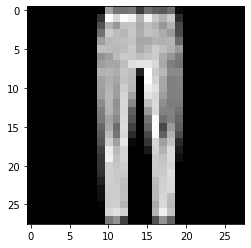

In [ ]:
i =  random.randint(1, 60000)
#plt.imshow(training[i,1:].reshape((28,28)))
plt.imshow(training[i,1:].reshape((28,28)), cmap='gray');

In [ ]:
label = training[i,0]
class_names[int(label)]

'Trouser'

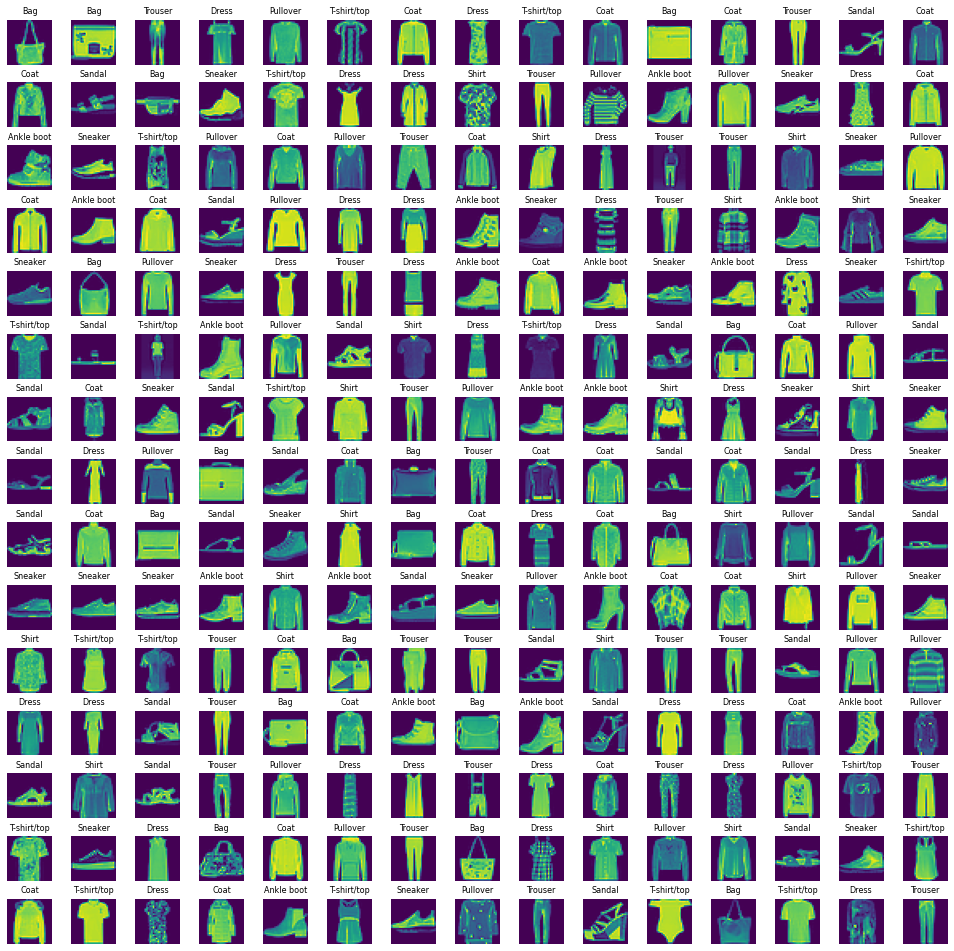

In [ ]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training[index,1:].reshape((28,28)))
  axes[i].set_title(class_names[int(training[index,0])], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
n_training

60000

# Etapa 4: Tratamento da base de dados

In [ ]:
X_train = training[:,1:] / 255
y_train = training[:,0]

In [ ]:
X_test = testing[:,1:] / 255
y_test = testing[:,0]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28,28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28,28, 1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

# Etapa 5: Construção e treinamento do modelo

In [ ]:
from tensorflow.keras import layers, models

### Definindo o modelo

In [ ]:
cnn = models.Sequential()

### Adicionado a primeira camada de convolução e a camada de max-pooling


Hyper-parâmetros da camada de convolução:
- filters (filtros): 16
- kernel_size (tamanho do kernel): 3
- padding (preenchimento): same
- função de ativação: relu
- input_shape (camada de entrada): (28, 28, 1)

Hyper-parâmetros da camada de max-pooling:
- pool_size: 2
- strides: 2
- padding: valid

In [ ]:
cnn.add(layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", input_shape=[28, 28, 1]))

In [ ]:
cnn.add(layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adicionando a segunda camada de convolução e a camada de max-pooling

Hyper-parâmetros da camada de convolução:
- filters (filtros): 32
- kernel_size (tamanho do kernel):3
- padding (preenchimento): same
- função de ativação: relu

Hyper-parâmetros da camada de max-pooling:
- pool_size: 2
- strides: 2
- padding: valid

In [ ]:
cnn.add(layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [ ]:
cnn.add(layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adicionando a terceira camada de convolução

Hyper-parâmetros da camada de convolução:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

In [ ]:
cnn.add(layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

### Adicionando a camada de flattening

In [ ]:
cnn.add(layers.Flatten())

###Adicionando a primeira camada densa (fully-connected)
Hyper-parâmetros da camada densa:

- units/neurônios: 64
- função de ativação: relu

In [ ]:
cnn.add(layers.Dense(64, activation = 'relu'))

### Adicionando a camada de saída

Hyper-parâmetros da camada de saída:

 - units/neurônios: 10 (número de classes)
 - activation: softmax


In [ ]:
cnn.add(layers.Dense(10, activation = 'softmax'))

In [ ]:

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [ ]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',
            metrics = ['accuracy'])

In [ ]:
epochs = 150

In [ ]:

%%time
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

# Etapa 6: Avaliação do modelo

In [ ]:
evaluation = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.6566 - accuracy: 0.9256


In [ ]:
evaluation

[0.6566212773323059, 0.925599992275238]

In [ ]:
#predicted_classes = cnn.predict_classes(X_test) - This function were removed in TensorFlow version 2.6.
predicted_classes = cnn.predict(X_test)

predicted_classes=np.argmax(predicted_classes,axis=1)

In [ ]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [ ]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

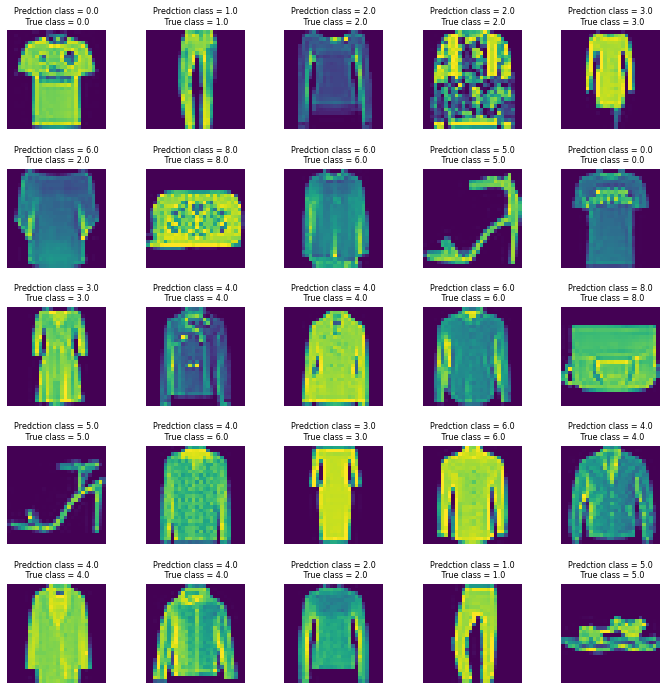

In [ ]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
  axes[i].imshow(X_test[i].reshape((28,28)))
  axes[i].set_title("Predction class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i], y_test[i]), fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

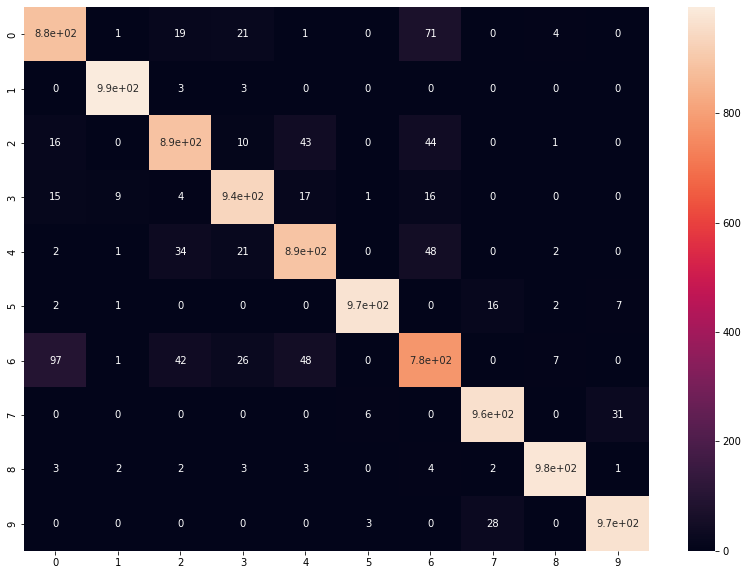

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.88      0.88      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.89      0.89      0.89      1000
       Dress       0.92      0.94      0.93      1000
        Coat       0.89      0.89      0.89      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.81      0.78      0.79      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

